In [1]:
# Here, we will evaluate and examine trends in used Hyundais for sale
# Source: https://www.kaggle.com/mysarahmadbhat/hyundai-used-car-listing

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import datetime as datetime

In [3]:
hyundai = pd.read_csv("hyundi.csv")

In [4]:
hyundai.head()

,model,year,price,transmission,mileage,fuelType,tax(£),mpg,engineSize
0,I20,2017,7999,Manual,17307,Petrol,145,58.9,1.2
1,Tucson,2016,14499,Automatic,25233,Diesel,235,43.5,2.0
2,Tucson,2016,11399,Manual,37877,Diesel,30,61.7,1.7
3,I10,2016,6499,Manual,23789,Petrol,20,60.1,1.0
4,IX35,2015,10199,Manual,33177,Diesel,160,51.4,2.0


In [5]:
# Let's learn more...

hyundai.describe()

,year,price,mileage,tax(£),mpg,engineSize
count,4860.000000,4860.00000,4860.000000,4860.000000,4860.000000,4860.000000
mean,2017.107613,12750.13107,21486.049588,121.147119,53.827798,1.457922
std,1.920456,5992.92231,17710.196964,58.003289,12.736042,0.400788
min,2000.000000,1200.00000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,8000.00000,8339.250000,125.000000,44.800000,1.200000
50%,2017.000000,11990.00000,17462.000000,145.000000,55.400000,1.600000
75%,2019.000000,15733.75000,30967.000000,145.000000,60.100000,1.700000
max,2020.000000,92000.00000,138000.000000,555.000000,256.800000,2.900000


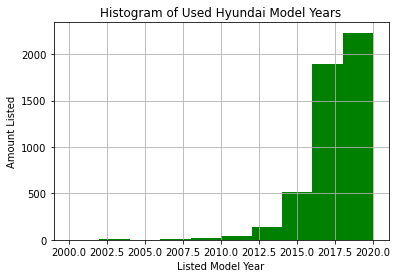

In [6]:
# Let's visualize some of these findings...
# First, let's see how old, or new, these listings are

years = hyundai.year

plt.hist(years, bins = 10, color = 'green')
plt.title("Histogram of Used Hyundai Model Years")
plt.xlabel("Listed Model Year")
plt.ylabel("Amount Listed")
plt.grid()
plt.show()

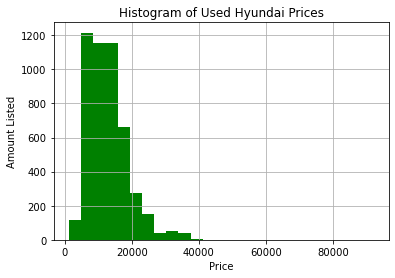

In [7]:
# Now, let's see prices

prices = hyundai.price

plt.hist(prices, bins = 25, color = "green")
plt.title("Histogram of Used Hyundai Prices")
plt.xlabel("Price")
plt.ylabel("Amount Listed")
plt.grid()
plt.show()

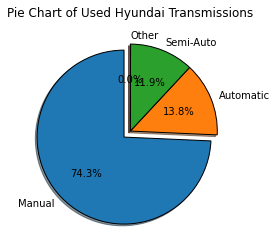

In [19]:
# How about Manuals versus Automatics?

trans = hyundai.transmission

categories = []

for i in range(0, len(trans)):
    if trans[i] not in categories:
        categories.append(trans[i])
        
manual = 0
auto = 0
semi = 0
other = 0

for i in range(0, len(trans)):
    if trans[i] == "Manual":
        manual += 1
    elif trans[i] == "Automatic":
        auto += 1
    elif trans[i] == "Semi-Auto":
        semi += 1
    else:
        other += 1
        
pie = [manual, auto, semi, other]

plt.pie(pie, labels = categories, shadow = True, explode = [0.1, 0, 0, 0], 
        startangle = 90, wedgeprops = {'edgecolor' : 'black'}, autopct = '%0.1f%%')
plt.title("Pie Chart of Used Hyundai Transmissions")
plt.show()
        
        


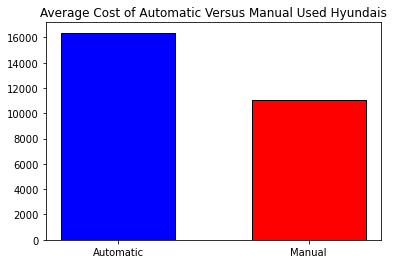

In [42]:
# This is cool, but can we have a bit more insight?
# For example, what are the average prices of
# an automatic versus a manual on the market?

automatic_prices = hyundai.loc[hyundai["transmission"] == "Automatic"]
manual_prices = hyundai.loc[hyundai["transmission"] == "Manual"]

ap = automatic_prices.price
mp = manual_prices.price

ap = ap.tolist()
mp = mp.tolist()

average_ap = sum(ap) / len(ap)
average_mp = sum(mp) / len(mp)

comparison = ["Automatic", "Manual"]
results = [average_ap, average_mp]

plt.bar(comparison, results, width = 0.6, color = ["blue", "red"], edgecolor = "black")
plt.title("Average Cost of Automatic Versus Manual Used Hyundais")
plt.show()

In [43]:
# Let's say that I have a used Hyundai that I want to sell on the market...
# Can we predict what I can sell my Hyundai for???

from sklearn import linear_model

In [44]:
# Checking if there are any nan values in hyundai...

hyundai.isnull().values.any()

False

In [45]:
# Let's create a linear model!
# I have chosen to use year, mileage, and mpg as features
# Our dependent variable is price

price_reg = linear_model.LinearRegression()
price_reg.fit(hyundai[['year','mileage','mpg']], hyundai.price)

LinearRegression()

In [50]:
# Taking a look at the coefficients...

price_reg.coef_

array([ 1.58167489e+03, -1.36444916e-02, -1.04180064e+02])

In [62]:
# Creating regression function...

def used_hyundai_value(model, year, mileage, mpg):
    value = round(year * price_reg.coef_[0] + mileage * price_reg.coef_[1] + mpg * price_reg.coef_[2] + price_reg.intercept_, 2)
    return "Your " + str(year) + " Hyundai " + model + " is worth " + str(value) + " pounds!"

In [63]:
used_hyundai_value("Civic", 2019, 19000, 45)

'Your 2019 Hyundai Civic is worth 16696.87 pounds!'